In [1]:
cd ~/data/ciss/pdsdata_sRM_2015-03-12T18-29-13.808978-2/

/Users/klay6683/data/ciss/pdsdata_sRM_2015-03-12T18-29-13.808978-2


In [2]:
fnames = !ls *.cub
fnames[2]

'N1485648669_1.map.cal.cub'

In [3]:
from pyciss import io

In [4]:
ringcube = io.RingCube(fnames[2])

In [6]:
data = ringcube.get_data()

In [7]:
import pandas as pd

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,12)

In [9]:
data.shape

(8596, 18812)

In [15]:
def show_window(x=0,y=0):
  xi = slice(x*1024, (x+1)*1024)
  yi = slice(y*1024, (y+1)*1024)
  plt.imshow(data[xi, yi], cmap='gray', aspect='auto',
            interpolation='none')
  plt.grid()
  print(xi)
  print(yi)
  plt.colorbar()

In [12]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


slice(0, 1024, None)
slice(9216, 10240, None)


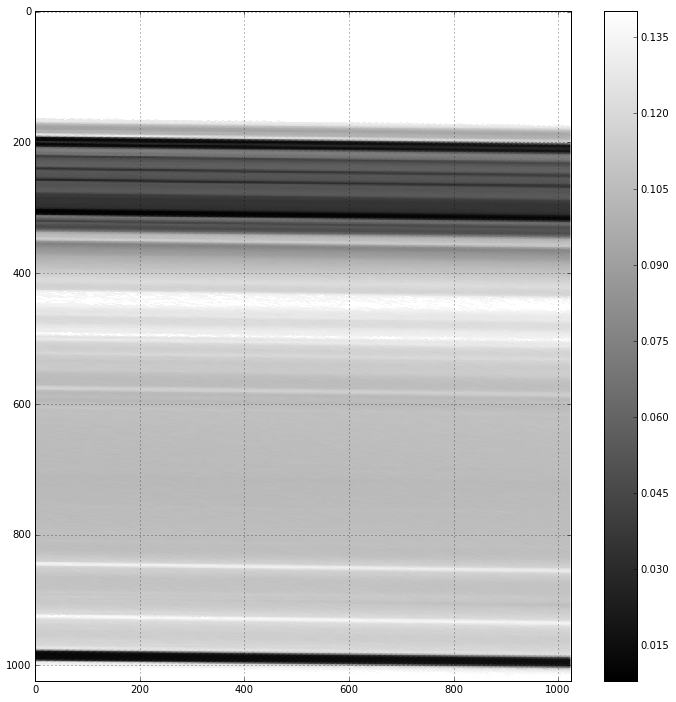

In [16]:
interact(show_window, 
         x=(0, data.shape[0]/1024), 
         y=(0, data.shape[1]/1024));

In [41]:
from skimage.measure import block_reduce

In [44]:
reduced = block_reduce(data, (10,10))

In [47]:
np.nanmean(reduced)

3.7520719

In [49]:
np.nanmin(reduced)

0.030904153

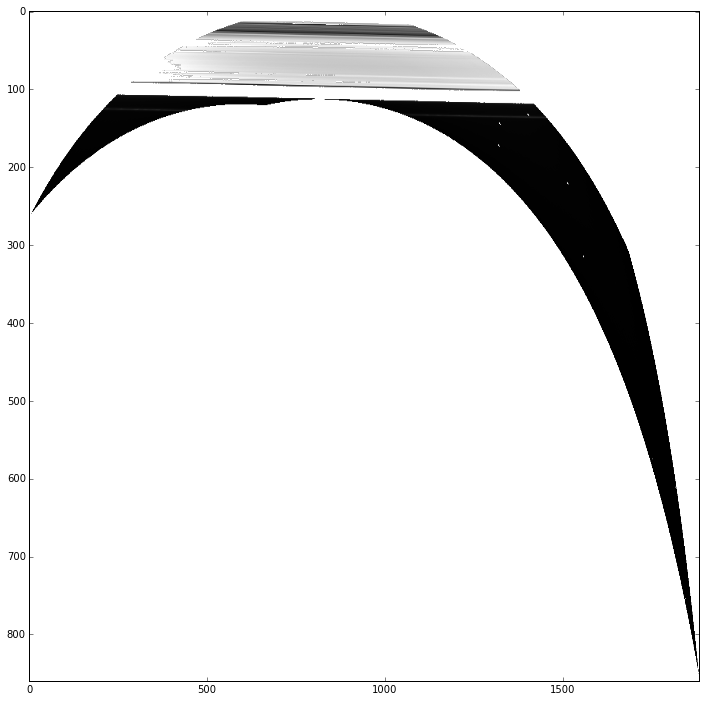

In [50]:
plt.imshow(reduced, cmap='gray')

In [51]:
cropped = reduced[:150]

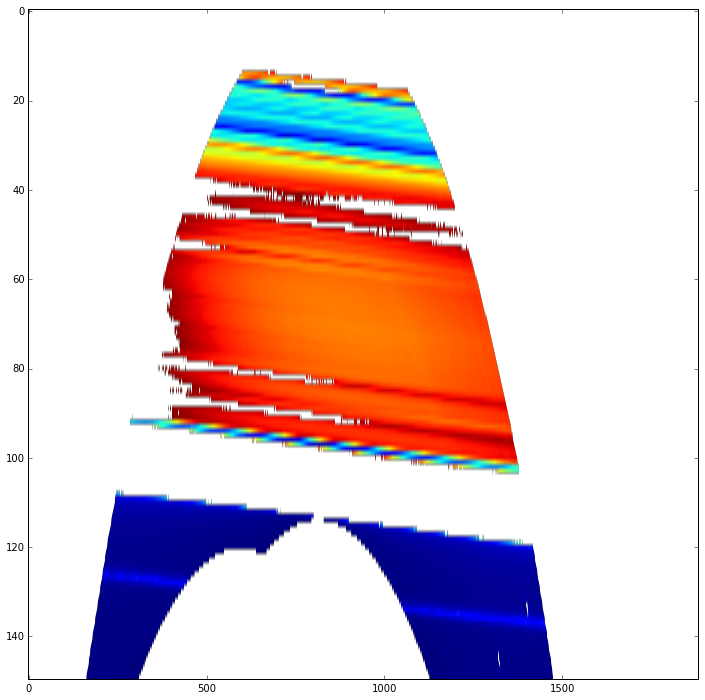

In [52]:
plt.imshow(cropped)

(150, 1882)